# EDA

Key step in data exploration are; <br>
- Data
- Aggregate
- Visualize
- Insights

Additionally, for this project we shall follow steps to find three key features in our data

- Most common words - find these and create word clouds
- Size of vocabulary - look number of unique words and also how quickly someone speaks
- Amount of profanity - most common terms

# 1)- Most Common Words

We have corpus and document terms matrix as our reference data files. To find most common words, we shall use document term matrix file

### a)- prepare data

In [0]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')

In [2]:
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,ability,abject,able,ablebodied,abortion,abroad,absofuckinglutely,absolute,absolutely,absorb,absorbing,abstain,abuse,abused,academically,acc,accent,accept,acceptable,acceptance,accepted,access,accident,accidentally,accomplished,accomplishment,according,accordingly,accoutrement,accurate,accustomed,accutane,achieve,...,yelled,yelling,yellow,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokel,yoko,yolanda,yolo,yooo,york,youd,youll,young,younger,youngest,youre,youth,youtube,youve,yulin,yummy,yyou,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zoning,zoo,éclair
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ali,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,2,...,0,1,0,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,4,2,0,0,31,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,1,...,2,0,1,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,5,0,0,0,59,0,1,1,0,1,0,1,0,0,0,0,1,1,2,1,0,0
bo,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,3,0,0,2,0,0,0,1,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,2,5,0,0,19,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,3,10,0,0,15,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,3,0,1,0,51,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,48,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,4,0,1,42,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,2,0,0,1,0,0,0,1,0,0,0,0,...,1,1,1,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,1,2,1,0,28,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### convert data to term-document matrix 

In [3]:
data = data.transpose()
data.head()

name,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


We have our colums as comedians as of variables or features. 

And our rows are words

In [4]:
data.shape

(6582, 12)

### top 30 words

In [5]:

# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 69),
  ('dont', 61),
  ('shit', 35),
  ('thats', 34),
  ('youre', 31),
  ('gonna', 28),
  ('woman', 27),
  ('ok', 26),
  ('lot', 25),
  ('day', 21),
  ('husband', 21),
  ('gotta', 21),
  ('oh', 21),
  ('wanna', 21),
  ('time', 20),
  ('right', 19),
  ('got', 19),
  ('cause', 18),
  ('people', 16),
  ('need', 15),
  ('pregnant', 15),
  ('god', 14),
  ('asian', 14),
  ('come', 14),
  ('tell', 14),
  ('dude', 14),
  ('make', 13),
  ('yeah', 13)],
 'anthony': [('im', 60),
  ('like', 51),
  ('joke', 50),
  ('know', 39),
  ('dont', 38),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('thing', 29),
  ('guy', 29),
  ('say', 28),
  ('day', 27),
  ('anthony', 27),
  ('people', 22),
  ('youre', 19),
  ('shark', 19),
  ('grandma', 19),
  ('tell', 19),
  ('time', 19),
  ('think', 18),
  ('right', 18),
  ('yeah', 17),
  ('dad', 16),
  ('good', 16),
  ('school', 16),
  ('kid', 16),
  ('baby', 16),
  ('ive', 15),
  ('gonna', 15),
  ('family', 15)],
 

In [6]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, dont, shit, thats, youre, gonna, woman, ok, lot, day, husband, gotta
---
anthony
im, like, joke, know, dont, got, said, thats, thing, guy, say, day, anthony, people
---
bill
like, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, guy, dude
---
bo
know, like, love, im, think, bo, stuff, repeat, dont, want, yeah, right, eye, slut
---
dave
like, know, said, im, shit, people, didnt, time, ahah, dont, thats, black, fuck, fucking
---
hasan
like, im, know, dont, dad, youre, going, say, thats, want, love, got, shes, time
---
jim
like, im, dont, right, fucking, know, went, youre, thing, gun, people, thats, fuck, day
---
joe
like, people, dont, fuck, fucking, im, thats, gonna, know, theyre, youre, think, shit, kid
---
john
like, know, dont, said, clinton, im, right, thats, time, say, youre, kid, little, hey
---
louis
like, know, dont, im, thats, youre, life, people, thing, tit, gonna, cause, kid, guy
---
mike
like, im, know, said, dont, say, think, thats, 

### stop word list

In [7]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'dont',
 'shit',
 'thats',
 'youre',
 'gonna',
 'woman',
 'ok',
 'lot',
 'day',
 'husband',
 'gotta',
 'oh',
 'wanna',
 'time',
 'right',
 'got',
 'cause',
 'people',
 'need',
 'pregnant',
 'god',
 'asian',
 'come',
 'tell',
 'dude',
 'make',
 'yeah',
 'im',
 'like',
 'joke',
 'know',
 'dont',
 'got',
 'said',
 'thats',
 'thing',
 'guy',
 'say',
 'day',
 'anthony',
 'people',
 'youre',
 'shark',
 'grandma',
 'tell',
 'time',
 'think',
 'right',
 'yeah',
 'dad',
 'good',
 'school',
 'kid',
 'baby',
 'ive',
 'gonna',
 'family',
 'like',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'guy',
 'dude',
 'want',
 'come',
 'fuck',
 'think',
 'kid',
 'let',
 'make',
 'people',
 'didnt',
 'thing',
 'day',
 'going',
 'say',
 'theyre',
 'time',
 'little',
 'know',
 'like',
 'love',
 'im',
 'think',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'want',
 'yeah',
 'right',
 'eye',
 'slut',
 'said',
 'people',
 'fucking',
 'con

### b)- aggregate

In [8]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('time', 10),
 ('got', 10),
 ('thing', 9),
 ('say', 9),
 ('gonna', 8),
 ('guy', 8),
 ('think', 8),
 ('oh', 7),
 ('come', 7),
 ('yeah', 7),
 ('said', 7),
 ('want', 7),
 ('day', 6),
 ('cause', 6),
 ('kid', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('good', 5),
 ('theyre', 5),
 ('woman', 4),
 ('going', 4),
 ('little', 4),
 ('dude', 3),
 ('make', 3),
 ('dad', 3),
 ('ive', 3),
 ('didnt', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('really', 3),
 ('ok', 2),
 ('lot', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('love', 2),
 ('look', 2),
 ('mom', 2),
 ('hey', 2),
 ('girl', 2),
 ('white', 2),
 ('way', 2),
 ('mean', 2),
 ('id', 2),
 ('husband', 1),
 ('gotta', 1),
 ('wanna', 1),
 ('need', 1),
 ('pregnant', 1),
 ('god', 1),
 ('asian', 1),
 ('anthony', 1),
 ('shark', 1),
 ('grandma', 1),
 ('baby', 1),
 ('family', 1),
 ('let', 1),
 ('bo', 1),
 ('stuff', 1),
 ('r

### Adding most frequent words in stop-word list

In [9]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'time',
 'got',
 'thing',
 'say',
 'gonna',
 'guy',
 'think',
 'oh',
 'come',
 'yeah',
 'said',
 'want']

In [0]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

In [11]:
data_stop

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,ability,abject,able,ablebodied,abortion,abroad,absofuckinglutely,absolute,absolutely,absorb,absorbing,abstain,abuse,abused,academically,acc,accent,accept,acceptable,acceptance,accepted,access,accident,accidentally,accomplished,accomplishment,according,accordingly,accoutrement,accurate,accustomed,accutane,achieve,...,yell,yelled,yelling,yellow,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokel,yoko,yolanda,yolo,yooo,york,youd,youll,young,younger,youngest,youth,youtube,youve,yulin,yummy,yyou,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zoning,zoo,éclair
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ali,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,2,...,0,0,1,0,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,4,2,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,1,...,0,2,0,1,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,2,1,0,0
bo,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,3,0,0,2,0,0,0,1,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,2,5,0,0,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,3,10,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,3,0,1,0,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,4,0,1,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,2,0,0,1,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,1,2,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [13]:
data = data_stop.transpose()
data.head()

name,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

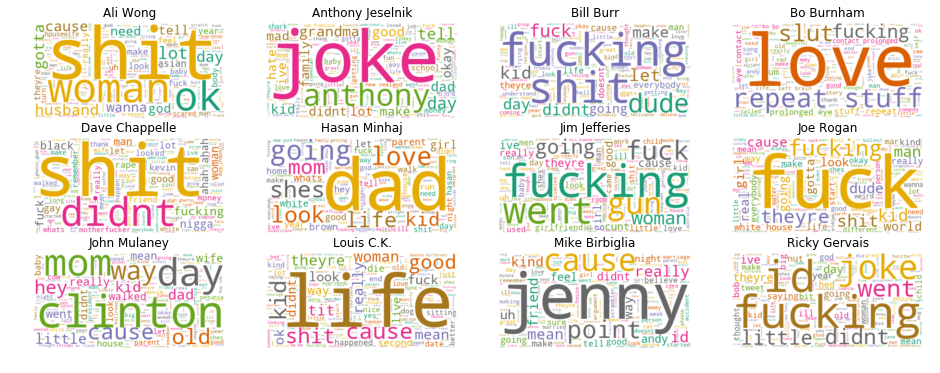

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Instead of each, we may look at overall word distribution

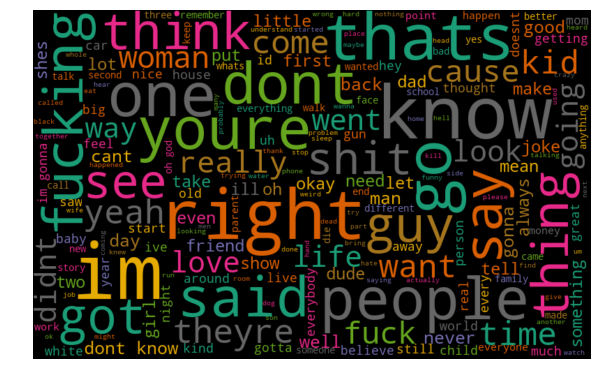

In [16]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in data_clean['transcript']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap="Dark2").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### alternative way of checking each comedians' most used words

In [17]:
data_clean

,transcript,word_count,char_count
name,,,
ali,lady gentleman please welcome stage ali wong h...,3618,22313
anthony,thank thank thank san francisco thank much goo...,3363,19937
bill,right thank thank much thank thank thank whats...,6093,36603
bo,bo old macdonald farm e e farm pig e e snort o...,3474,20762
dave,dave tell dirty joke living stare hard work ha...,4692,28081
hasan,whats davis whats im home bring back netflix s...,5334,31451
jim,lady gentleman please welcome stage mr jim jef...,5401,32191
joe,lady gentleman welcome joe rogan fuck going sa...,5052,30548
john,right petunia wish luck die august thats prett...,4551,27267


In [18]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

data_clean['full_name'] = full_names
data_clean

,transcript,word_count,char_count,full_name
name,,,,
ali,lady gentleman please welcome stage ali wong h...,3618,22313,Ali Wong
anthony,thank thank thank san francisco thank much goo...,3363,19937,Anthony Jeselnik
bill,right thank thank much thank thank thank whats...,6093,36603,Bill Burr
bo,bo old macdonald farm e e farm pig e e snort o...,3474,20762,Bo Burnham
dave,dave tell dirty joke living stare hard work ha...,4692,28081,Dave Chappelle
hasan,whats davis whats im home bring back netflix s...,5334,31451,Hasan Minhaj
jim,lady gentleman please welcome stage mr jim jef...,5401,32191,Jim Jefferies
joe,lady gentleman welcome joe rogan fuck going sa...,5052,30548,Joe Rogan
john,right petunia wish luck die august thats prett...,4551,27267,John Mulaney


In [19]:
data_clean['full_name']

name
ali                Ali Wong
anthony    Anthony Jeselnik
bill              Bill Burr
bo               Bo Burnham
dave         Dave Chappelle
hasan          Hasan Minhaj
jim           Jim Jefferies
joe               Joe Rogan
john           John Mulaney
louis            Louis C.K.
mike         Mike Birbiglia
ricky         Ricky Gervais
Name: full_name, dtype: object

### checking for Bill Burr as an example

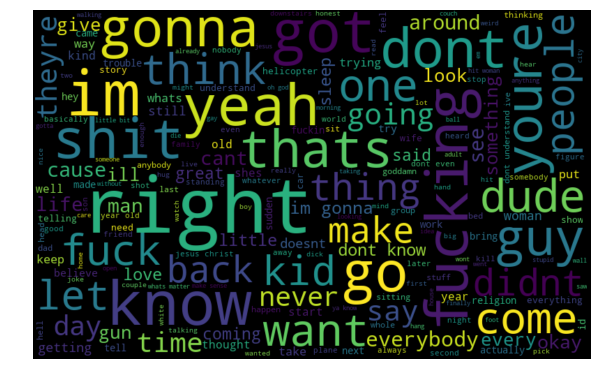

In [20]:
normal_words =' '.join([text for text in data_clean['transcript'][data_clean['full_name'] == 'Bill Burr']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 2)- Size of vocabulary  

look number of unique words and also how quickly someone speaks

In [21]:
data.head()

name,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [22]:
data[comedian][:5]

aaaaah              0
aaaaahhhhhhh        0
aaaaauuugghhhhhh    0
aaaahhhhh           0
aaah                0
Name: ricky, dtype: int64

In [23]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].nonzero()[0].size
    unique_list.append(uniques)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
 unique_list

[1228, 884, 1478, 1176, 1266, 1418, 1152, 1272, 1260, 973, 1348, 1479]

In [25]:
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,884
9,Louis C.K.,973
6,Jim Jefferies,1152
3,Bo Burnham,1176
0,Ali Wong,1228
8,John Mulaney,1260
4,Dave Chappelle,1266
7,Joe Rogan,1272
10,Mike Birbiglia,1348
5,Hasan Minhaj,1418


### words per minute of each comedian

It would show how fast they speak during their routine

total word/run time

In [26]:
# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,884,2295,59,38.898305
9,Louis C.K.,973,2470,58,42.586207
0,Ali Wong,1228,2564,60,42.733333
3,Bo Burnham,1176,2602,60,43.366667
10,Mike Birbiglia,1348,3431,76,45.144737
6,Jim Jefferies,1152,3607,77,46.844156
4,Dave Chappelle,1266,3255,67,48.582090
2,Bill Burr,1478,3943,80,49.287500
11,Ricky Gervais,1479,3916,79,49.569620
8,John Mulaney,1260,3163,62,51.016129


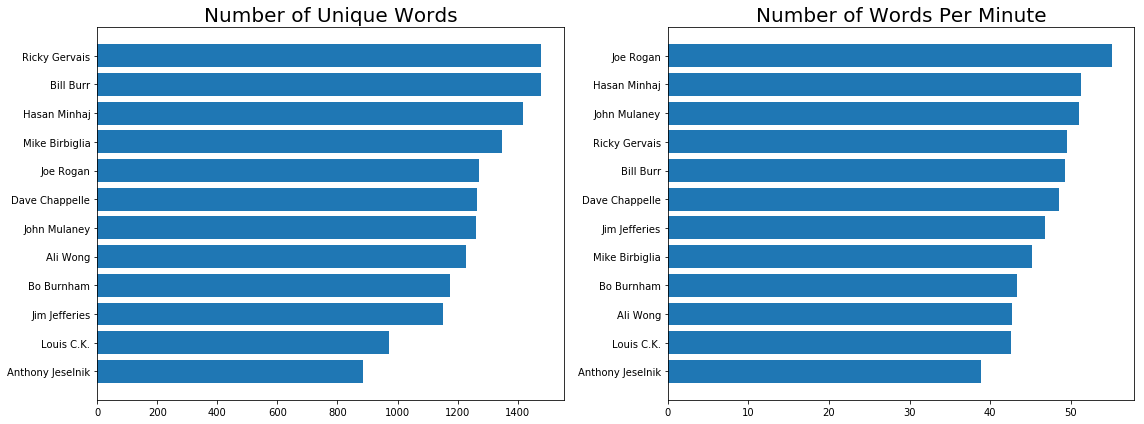

In [27]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

# 3)-Amount of Profanity

In [28]:
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('time', 10),
 ('got', 10),
 ('thing', 9),
 ('say', 9),
 ('gonna', 8),
 ('guy', 8),
 ('think', 8),
 ('oh', 7),
 ('come', 7),
 ('yeah', 7),
 ('said', 7),
 ('want', 7),
 ('day', 6),
 ('cause', 6),
 ('kid', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('good', 5),
 ('theyre', 5),
 ('woman', 4),
 ('going', 4),
 ('little', 4),
 ('dude', 3),
 ('make', 3),
 ('dad', 3),
 ('ive', 3),
 ('didnt', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('really', 3),
 ('ok', 2),
 ('lot', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('love', 2),
 ('look', 2),
 ('mom', 2),
 ('hey', 2),
 ('girl', 2),
 ('white', 2),
 ('way', 2),
 ('mean', 2),
 ('id', 2),
 ('husband', 1),
 ('gotta', 1),
 ('wanna', 1),
 ('need', 1),
 ('pregnant', 1),
 ('god', 1),
 ('asian', 1),
 ('anthony', 1),
 ('shark', 1),
 ('grandma', 1),
 ('baby', 1),
 ('family', 1),
 ('let', 1),
 ('bo', 1),
 ('stuff', 1),
 ('r

In [29]:
data.transpose()

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,ability,abject,able,ablebodied,abortion,abroad,absofuckinglutely,absolute,absolutely,absorb,absorbing,abstain,abuse,abused,academically,acc,accent,accept,acceptable,acceptance,accepted,access,accident,accidentally,accomplished,accomplishment,according,accordingly,accoutrement,accurate,accustomed,accutane,achieve,...,yell,yelled,yelling,yellow,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokel,yoko,yolanda,yolo,yooo,york,youd,youll,young,younger,youngest,youth,youtube,youve,yulin,yummy,yyou,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zoning,zoo,éclair
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ali,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,0,0,2,...,0,0,1,0,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,4,2,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,1,...,0,2,0,1,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,2,1,0,0
bo,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,3,0,0,2,0,0,0,1,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,2,5,0,0,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,3,10,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,3,0,1,0,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,4,0,1,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,2,0,0,1,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,1,2,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit','slut']]
data_bad_words

,fucking,fuck,shit,slut
name,,,,
ali,5,11,35,0
anthony,6,9,9,0
bill,70,37,64,0
bo,22,15,7,23
dave,32,33,47,0
hasan,8,16,15,0
jim,78,41,20,1
joe,69,70,40,0
john,2,2,6,0


In [31]:
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit + data_bad_words.slut], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
name,,
ali,16,35
anthony,15,9
bill,107,64
bo,37,30
dave,65,47
hasan,24,15
jim,119,21
joe,139,40
john,4,6


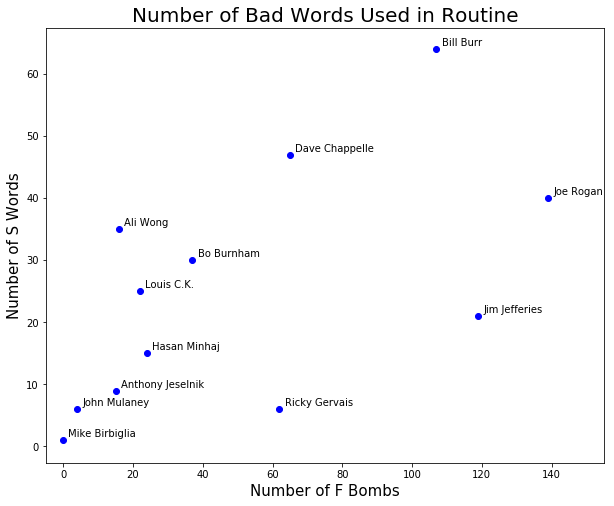

In [32]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Checking some clean words

i.e those that are used for family references

Louis CK , Bill Burr tells alot of jokes about their family , friends and even society. Ali wang does talk about her husband . So, let's see how clean jokes are

In [33]:
# Let's isolate just these bad words
family_words = data.transpose()[['mom', 'kid', 'husband','wife']]
family_words

,mom,kid,husband,wife
name,,,,
ali,9,7,21,0
anthony,11,16,1,1
bill,3,35,0,10
bo,1,3,0,0
dave,0,5,1,12
hasan,26,22,0,0
jim,0,16,0,3
joe,7,38,1,4
john,23,26,0,18


In [34]:
data_relation = pd.concat([family_words.mom + family_words.kid, family_words.husband + family_words.wife], axis=1)
data_relation.columns = ['family', 'spouse']
data_relation

,family,spouse
name,,
ali,16,21
anthony,27,2
bill,38,10
bo,4,0
dave,5,13
hasan,48,0
jim,16,3
joe,45,5
john,49,18


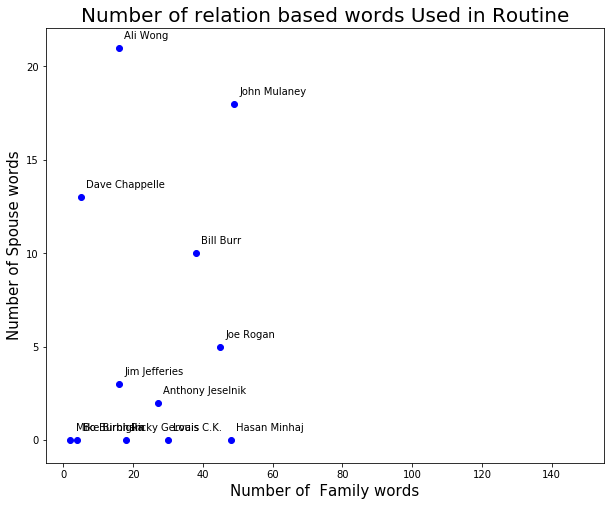

In [35]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_relation.index):
    x = data_relation.family.loc[comedian]
    y = data_relation.spouse.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of relation based words Used in Routine', fontsize=20)
plt.xlabel('Number of  Family words', fontsize=15)
plt.ylabel('Number of Spouse words', fontsize=15)

plt.show()

Ali wong is medium on profanity compared to others. On other hand, she has highest family related words in her routine. she is more interested in talking about her spouse than kids though. Perhaps in few years to come, she would add that.

Hassan Minaj being single does not talk about spouse. He talks alot about family though. we may add more for single comedians their friends and other relative